# 2.2 Integration with pandas data frames


<div class="alert alert-info">

Please note: The following steps require the [pandas](https://pandas.pydata.org/docs/user_guide/index.html) package.
    
    
</div>

In [2]:
import pandas as pd
import signac

project = signac.get_project(root="projects/tutorial")

Let's first create a basic data frame from our project:

In [6]:
df = project.to_dataframe()
df

,sp.p,sp.kT,sp.N,doc.V
5a6c687f7655319db24de59a2336eff8,0.1,1.0,1000,10000.0
ee617ad585a90809947709a7a45dda9a,1.0,1.0,1000,1000.0
5a456c131b0c5897804a4af8e77df5aa,10.0,1.0,1000,100.0


Now we can select specific data subsets, for example to calculate the mean gas volume of argon for a pressure *p* between 2.0 and 5.0:

In [12]:
df[(df['sp.p'] == 0.1) & (df['doc.V'] <= 5.0)]

,sp.p,sp.kT,sp.N,doc.V


Or we can plot a p-V phase diagram for argon (*requires matplotlib*).

<AxesSubplot:xlabel='p'>

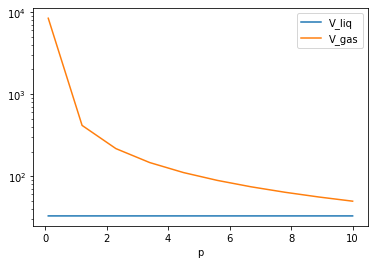

In [6]:
%matplotlib inline

df_water = df[df.fluid == "argon"][["p", "V_liq", "V_gas"]]
df_water.sort_values("p").set_index("p").plot(logy=True)

Or we group the data by fluid and compare the gas densities for low pressures:

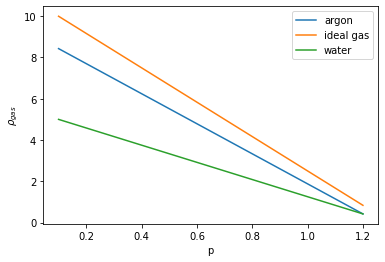

In [7]:
from matplotlib import pyplot as plt

for fluid, group in df[df.p < 2].groupby("fluid"):
    d = group.sort_values("p")
    plt.plot(d["p"], d["V_gas"] / d["N"], label=fluid)
plt.xlabel("p")
plt.ylabel(r"$\rho_{gas}$")
plt.legend(loc=0)
plt.show()